In [27]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline  

In [2]:
from sklearn import preprocessing

let ${\bf x}$ be a $d$-dimensional cosmological dataset. There are $N_s$ realizations of ${\bf x}$

Let ${\bf x} = P({\bf k})$ calculated from the Nseries mock catalogs

In [3]:
def readPk(i, rebin=20): 
    ''' Read P(k) in dat/ directory and rebin in k. 
    '''
    # read in Pk from dat
    file = ''.join(['dat/', 'power_CutskyN', str(i), '.dat.grid360.P020000.box3600'])
    k, Pk, counts = np.loadtxt(file, unpack=True, usecols=[0,1,-1])
    
    # re-bin 
    tot_counts, avg_k, avg_Pk = [], [], []
    
    i_threshold = (np.abs(k[::rebin] - 0.05)).argmin()
    for ii in range(i_threshold*rebin)[::2]: 
        indices = range(len(k))[ii:ii+2]

        # all mode counts 
        allcounts = np.sum(counts[indices])
        tot_counts.append(allcounts)
        avg_k.append(np.sum(k[indices] * counts[indices])/allcounts)
        avg_Pk.append(np.sum(Pk[indices] * counts[indices])/allcounts)
        
    for istart in range(len(k))[::rebin]: 
        if istart < i_threshold*rebin: 
            continue 
        indices = range(len(k))[istart:istart+rebin]

        # all mode counts 
        allcounts = np.sum(counts[indices])
        tot_counts.append(allcounts)
        avg_k.append(np.sum(k[indices] * counts[indices])/allcounts)
        avg_Pk.append(np.sum(Pk[indices] * counts[indices])/allcounts)

    return [np.array(avg_k), np.array(avg_Pk)]

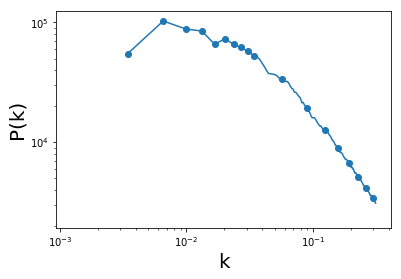

In [6]:
k1, pk1 = readPk(1, rebin=1)
plt.plot(k1, pk1)
k2, pk2 = readPk(1)
plt.scatter(k2, pk2)
plt.xscale('log')
plt.xlabel('k', fontsize=20)
plt.yscale('log')
plt.ylabel('P(k)', fontsize=20)

In [7]:
all_pk = []
for i in range(84): 
    k, pk = readPk(i+1)
    all_pk.append(pk)
    
all_pk_arr = preprocessing.scale(np.array(all_pk))

In [20]:
mu_pk = np.sum(np.array(all_pk), axis=0)/len(all_pk)

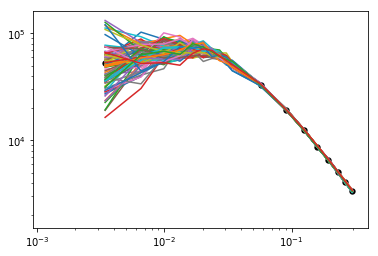

In [22]:
fig = plt.figure()
sub = fig.add_subplot(111)
for i in range(84): 
    sub.plot(k, all_pk[i])
sub.scatter(k, mu_pk, lw=0, s=40, c='k')
sub.set_xscale("log")
sub.set_yscale("log")

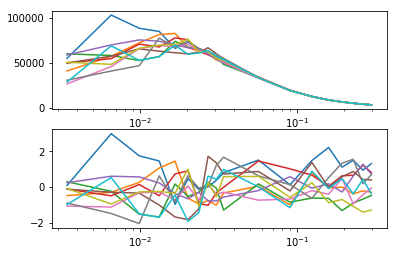

In [14]:
fig = plt.figure()
sub1 = fig.add_subplot(211)
for i in range(10): 
    sub1.plot(k, all_pk[i])
sub1.set_xscale('log')
sub2 = fig.add_subplot(212)
for i in range(10): 
    sub2.plot(k, all_pk_arr[i])
sub2.set_xscale('log')

In [23]:
all_pk = []
for i in range(84): 
    k, pk = readPk(i+1)
    all_pk.append(pk)
    
all_pk_arr = preprocessing.scale(np.array(all_pk))
cov = np.cov(all_pk_arr.T)
corr = np.corrcoef(all_pk_arr.T)

In [32]:
inv_cov = np.linalg.pinv(cov)
L = np.linalg.cholesky(inv_cov) # whitening matrix
W = L.T

In [33]:
pk_white = [] 
for pk in all_pk_arr: 
    pk_white.append(np.dot(W, pk.T))
pk_white = np.array(pk_white)

In [34]:
cov_white = np.cov(pk_white.T)

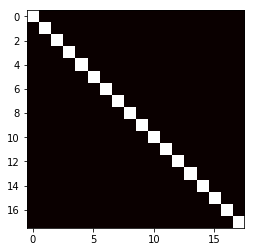

In [35]:
plt.imshow(cov_white, interpolation='none', cmap='hot')

In [12]:
def s_plus(i, e, f): 
    return pk_white[i][e] + pk_white[i][f]

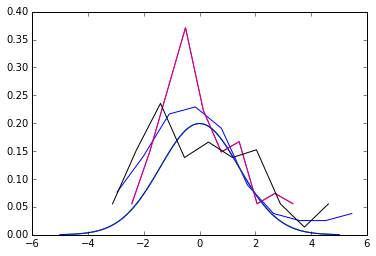

In [13]:
for ii in range(2): 
    for jj in range(2):
        dist_s_plus = [s_plus(i, ii, jj) for i in range(84)]
        p_splus, bin_edge = np.histogram(dist_s_plus, normed=True)
        plt.plot(0.5*(bin_edge[:-1]+ bin_edge[1:]), p_splus)
        x = np.arange(-5., 5.1, 0.1)
        plt.plot(x, 1./(np.sqrt(2.*np.pi)*2.)*np.exp((-x**2)/4))

In [14]:
def gauss(x, mu=0., sigma=2.): 
     return 1./(np.sqrt(2.*np.pi)*sigma)*np.exp((-(x-mu)**2)/(2*sigma))

In [15]:
Splus = np.zeros((len(pk_white[0]), len(pk_white[0])))
for i in range(Splus.shape[0]): 
    for j in range(Splus.shape[1]):
        x = np.arange(-10., 10.5, 0.5)
        psplus, bin_edge = np.histogram([s_plus(i_s, i, j) for i_s in range(84)])
        bin_mid = 0.5*(bin_edge[1:] + bin_edge[:-1])
        Splus[i,j] = np.sum((psplus - gauss(bin_mid, mu=0., sigma=2.))**2)/np.float(len(bin_mid))

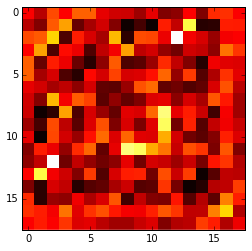

In [16]:
plt.imshow(Splus, interpolation='none', cmap='hot')

In [132]:
preprocessing.scale?